In [1]:
import torch
from pathlib import Path
from siren.models.dcgan import Model as DCGAN
from siren.models.sirengan import Model as SIRENGAN
from siren.models.generate import walk

In [2]:
model = SIRENGAN(channels=1)
model.load(Path('../models/sirengan_mnist').expanduser())

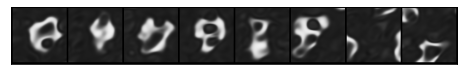

In [3]:
walk(
    model,
    torch.FloatTensor(1, 2),
    torch.randn(1, 2),
    torch.randn(1, 2),
    8,
    Path('../reports/figures/sirengan_mnist'))

In [4]:
from siren.shader.utils import dump, serialize

in_w = dump(model.G.main[0].linear.weight)
in_b = dump(model.G.main[0].linear.bias)
print(in_w)
print(in_b)

out_w = dump(model.G.main[-2].weight)
out_b = dump(model.G.main[-2].bias)
print(out_w)
print(out_b)

[[-0.17750561 -0.0565691   0.19368085  0.11881258]
 [ 0.18853584  0.03961671  0.06536561 -0.00183226]
 [ 0.05615392  0.09044136 -0.19651428  0.13768023]
 [ 0.06496934 -0.17904258  0.06952857  0.23744395]
 [ 0.17071044  0.0596199   0.03014295  0.0275148 ]
 [ 0.20146899 -0.03152279 -0.04607434  0.00779213]
 [ 0.04459399 -0.12356322  0.01065774 -0.22801918]
 [ 0.05034352  0.15518652  0.02768185 -0.0092482 ]
 [-0.03905962  0.07063207 -0.07073797 -0.24103488]
 [-0.18388334 -0.04804137  0.0089985   0.14871521]
 [ 0.1921083   0.21261638 -0.21170697 -0.12569231]
 [ 0.04200086 -0.09380235  0.0043001   0.00672705]
 [ 0.00824829 -0.18337123 -0.17789912  0.0720551 ]
 [-0.25056064  0.15666787 -0.14187403 -0.2241949 ]
 [ 0.11343311 -0.07188872 -0.0312765   0.06376684]
 [ 0.07468285  0.08562696 -0.00457178 -0.00386467]
 [-0.13237756 -0.02576638  0.14268027  0.19247937]
 [ 0.17617464  0.1512047  -0.07498631 -0.08527912]
 [-0.11320695 -0.12780748 -0.1838451   0.08304397]
 [ 0.01577335  0.02907282 -0.14

In [5]:
serialize(model.G, 'f')

vec4 f0_0 = sin(p.x * vec4(-5.325,5.656,1.685,1.949) + p.y * vec4(1.697,-1.189,-2.713,5.371) + p.z * vec4(5.81,1.961,-5.895,2.086) + p.w * vec4(3.564,-.05497,4.13,7.123) + vec4(10.93,-10.63,-14.78,-14.66));
vec4 f0_1 = sin(p.x * vec4(5.121,6.044,1.338,1.51) + p.y * vec4(-1.789,.9457,3.707,-4.656) + p.z * vec4(.9043,-1.382,.3197,.8305) + p.w * vec4(.8254,.2338,-6.841,-.2774) + vec4(-.3992,9.869,-2.157,-15.48));
vec4 f0_2 = sin(p.x * vec4(-1.172,-5.516,5.763,1.26) + p.y * vec4(-2.119,1.441,-6.378,2.814) + p.z * vec4(-2.122,.27,-6.351,.129) + p.w * vec4(-7.231,4.461,-3.771,.2018) + vec4(11.87,1.687,-7.841,7.838));
vec4 f0_3 = sin(p.x * vec4(.2474,-7.517,3.403,2.24) + p.y * vec4(5.501,-4.7,2.157,-2.569) + p.z * vec4(-5.337,-4.256,-.9383,-.1372) + p.w * vec4(2.162,-6.726,1.913,-.1159) + vec4(-9.819,5.761,-2.061,10.94));
vec4 f0_4 = sin(p.x * vec4(-3.971,5.285,-3.396,.4732) + p.y * vec4(.773,-4.536,3.834,-.8722) + p.z * vec4(4.28,-2.25,-5.515,-4.211) + p.w * vec4(5.774,-2.558,2.491,-5.763) +